# 28: Bayesian Classification

### Bringing Back Bayes

> "Naive Bayes classifiers are linear classifiers that are known for being **simple yet very efficient**. The probabilistic model of naive Bayes classifiers is based on Bayes’ theorem, and the adjective naive comes from the assumption that the features in a dataset are **mutually independent**. In practice, the independence assumption is often violated, but naive Bayes classifiers **still tend to perform very well** under this unrealistic assumption. Especially for small sample sizes, naive Bayes classifiers can outperform the more powerful alternatives."

[Source: Sebasitian Raschka: Naive Bayes and Text Classification](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html) 

In [1]:
sports = ['the match was close',
          'the coaches agreed on strategy',
          'played in a sold out stadium']

politics = ['world leaders met last week',
            'the election was close',
            'the officials agreed on a compromise']

test_statement = 'world leaders agreed to fund the stadium'

#### Revisiting the theorem itself:

<img src="resources/bayes_theorem.svg" width="300">

<img src="resources/naive_bayes_icon.png" width = "400">

___

<img src="resources/another_one.png" width = "600">

### In the context of our problem:

$$ P(politics | document) = \frac{P(document|politics)P(politics)}{P(document)}$$



## Breaking the Equation Down

### How should we calculate $ P(politics) $ ?

This is essentially the distribution of the probability of either type of article. We have three of each type of article in our current set of example documents, therefore, we assume that there is an equal probability of either type.


$$ P(politics) = \frac{\# politics\ documents}{\# all\ documents} $$

In [2]:
print(politics, '\n')

p_politics = len(politics)/(len(politics) + len(sports))
print('P(politics) = ', p_politics)

p_sports = len(sports)/(len(politics) + len(sports))
print('P(sports) = ', p_sports)

['world leaders met last week', 'the election was close', 'the officials agreed on a compromise'] 

P(politics) =  0.5
P(sports) =  0.5


### How should we calculate $ P(document | politics) $ ?

We need to break the phrases down into individual words - with the hope that these words actually tell us more, since we likely have never seen this exact document before.

In [3]:
test_statement

'world leaders agreed to fund the stadium'

$$ P(phrase | politics) = \prod_{i=1}^{d} P(word_{i} | politics) $$
$$ P(word_{i} | politics) = \frac{\#\ of\ word_{i}\ in\ politics\ docs} {\#\ of\ total\ words\ in\ politics\ docs} $$

What if you see a word in your test statement that your model hasn't encountered before? The numerator becomes zero! 

#### Enter: Laplace Smoothing

$$ P(word_{i} | politics) = \frac{\#\ of\ word_{i}\ in\ politics\ docs + \alpha} {\#\ of\ total\ words\ in\ politics\ docs + \alpha d} $$

This correction process is called Laplace Smoothing:

- d : number of features (in this instance total number of vocabulary words)
- $\alpha$ can be any number greater than 0 (it is usually 1)

### How should we calculate $ P(document) $ ?

We don't have to, because the P(document) doesn't change whether we're looking at sports or politics, we're just going to compare the numerator of these to see which is bigger between sports or politics!

### So why is this 'naive' ?

> "Naive Bayes (NB) is ‘naive’ because it makes the assumption that features of a measurement are independent of each other. This is naive because it is (almost) never true."

[Source - 'What's So Naive About Naive Bayes?', a Towards Data Science blog post all about this](https://towardsdatascience.com/whats-so-naive-about-naive-bayes-58166a6a9eba)

## Applying our equations:

| word       | frequency in politics | frequency in sports |
| ---------- | --------------------- | ------------------- |
| the        |  2                    | 2                   |
| match      |  0                    | 1                   |
| was        |  1                    | 1                   |
| close      |  1                    | 1                   |
| coaches    |  0                    | 1                   |
| agreed     |  1                    | 1                   |
| on         |  1                    | 1                   |
| strategy   |  0                    | 1                   |
| played     |  0                    | 1                   |
| in         |  0                    | 1                   |
| a          |  1                    | 1                   |
| sold       |  0                    | 1                   |
| out        |  0                    | 1                   |
| stadium    |  0                    | 1                   |
| world      |  1                    | 0                   |
| leaders    |  1                    | 0                   |
| met        |  1                    | 0                   |
| last       |  1                    | 0                   |
| week       |  1                    | 0                   |
| election   |  1                    | 0                   |
| officials  |  1                    | 0                   |
| compromise |  1                    | 0                   |

> Test sentence: 'world leaders agreed to fund the stadium'

| word    | $ P( word | politics) $                | $ P( word | sports) $                  |
| ------- | -------------------------------------- | -------------------------------------- |
| world   | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ |
| leaders | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ |
| agreed  | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ |
| to      | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ |
| fund    | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ |
| the     | $\frac{2 + 1}{15 + 30} = \frac{3}{45}$ | $\frac{2 + 1}{15 + 30} = \frac{3}{45}$ |
| stadium | $\frac{0 + 1}{15 + 30} = \frac{1}{45}$ | $\frac{1 + 1}{15 + 30} = \frac{2}{45}$ |

In [4]:
# Initial imports

import numpy as np
np.random.seed(123)
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

Remember, we want

$ P(document|sports) * P(sports) $ **vs.** $ P(document|politics) * P(politics) $

We already calculated $P(sports)$ and $P(politics)$ above - they're both 50% since we have an equal number of documents in each. But the $P(document | label)$ for the two labels is going to require breaking out each word to find the likelihood that each word is in each category (plus Laplacian smoothing)

In [5]:
def vocab_maker(category):
    """
    returns the vocabulary for a given type of article
    """
    vocab_category = set()
    for art in category:
        words = art.split()
        for word in words:
            vocab_category.add(word)
    return vocab_category
        
voc_sports = vocab_maker(sports)
voc_pol = vocab_maker(politics)
total_vocabulary = voc_sports.union(voc_pol)

In [6]:
total_vocab_count = len(total_vocabulary) # useful for laplacian smoothing
total_sports_count = len(voc_sports)
total_politics_count = len(voc_pol)

In [7]:
def find_number_words_in_category(phrase, category):
    '''
    returns number of words in the phrase previously found in the category
    
    inputs:
    phrase - string, test phrase to classify
    category - list, all training phrases associated with that category
    
    output:
    word_count - default dictionary, with each word in the phrase as a key 
                 with a value of the number of times the words have 
                 appeared in the category in the train set
    '''
    # gets each word out - statement is a list object now
    statement = phrase.split()
    
    # creating one big string from the provided category list
    str_category=' '.join(category)
    # splitting now so it's a single list of the words found in the category
    cat_word_list = str_category.split()
    # default dict allows us to create new keys easily
    word_count = defaultdict(int) 
    
    for word in statement:
        for cat_word in cat_word_list:
            if word == cat_word:
                word_count[word] +=1
            else:
                word_count[word] # here's the part that works because default dict
    return word_count

In [8]:
test_sports_word_count = find_number_words_in_category(test_statement,sports)
test_sports_word_count

defaultdict(int,
            {'world': 0,
             'leaders': 0,
             'agreed': 1,
             'to': 0,
             'fund': 0,
             'the': 2,
             'stadium': 1})

In [9]:
test_politic_word_count = find_number_words_in_category(test_statement,politics)
test_politic_word_count

defaultdict(int,
            {'world': 1,
             'leaders': 1,
             'agreed': 1,
             'to': 0,
             'fund': 0,
             'the': 2,
             'stadium': 0})

$$ P(politics | article) = P(politics) x \prod_{i=1}^{d} P(word_{i} | politics) $$

$$ P(word_{i} | politics) = \frac{\#\ of\ word_{i}\ in\ politics\ docs + \alpha} {\#\ of\ total\ words\ in\ politics\ docs + \alpha d} $$

In [10]:
def find_likelihood(category_count, test_category_count, alpha):
    
    num = np.product(np.array(list(test_category_count.values())) + alpha)
    denom = (category_count + total_vocab_count*alpha)**(len(test_category_count))
    
    return num/denom

In [11]:
likelihood_sports = find_likelihood(total_sports_count,test_sports_word_count,1)
likelihood_politics = find_likelihood(total_politics_count,test_politic_word_count,1)

print(likelihood_sports)
print(likelihood_politics)

(likelihood_politics * p_politics) > (likelihood_sports * p_sports)

1.5313121933259447e-10
3.0626243866518893e-10


True

## In Summary...

### Pros:

* It is an efficient way to predict classes of your test data set. It performs well in multiclass prediction
* When assumption of independence holds, a Naive Bayes classifier requires less training data and can perform better than models like logistic regression.
* Performs better with categorical inputs. For numerical input, one has to assume a normal distribution.

### Cons:

* Naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously
* We are assuming of independent predictors, but in real life, it is almost impossible that we get a set of predictors which are completely independent (amazingly, still works a lot of the time though!)

# Implementation

In [12]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix

from sklearn.naive_bayes import GaussianNB

In [13]:
# fetching our data
news_train = fetch_20newsgroups(subset='train', 
                                categories = ['rec.sport.baseball', 
                                              'talk.politics.misc'])
news_test = fetch_20newsgroups(subset='test', 
                               categories = ['rec.sport.baseball', 
                                              'talk.politics.misc'])

# collecting data in dataframe
df_train = pd.DataFrame()
df_train['Data'] = news_train.data
df_train['Target'] = news_train.target

df_test = pd.DataFrame()
df_test['Data'] = news_test.data
df_test['Target'] = news_test.target

In [14]:
target_classes = dict(enumerate(news_test.target_names))
target_classes

{0: 'rec.sport.baseball', 1: 'talk.politics.misc'}

In [15]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 2 columns):
Data      1062 non-null object
Target    1062 non-null int64
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


,Data,Target
0,From: pcaster@mizar.usc.edu (Dodger)\nSubject:...,0
1,From: lbr@holos0.uucp (Len Reed)\nSubject: Re:...,0
2,From: scott@asd.com (Scott Barman)\nSubject: R...,0
3,Organization: City University of New York\nFro...,1
4,From: dos@major.panix.com (Dave O'Shea)\nSubje...,1


In [16]:
df_train.Target.value_counts()

0    597
1    465
Name: Target, dtype: int64

In [17]:
df_test.Target.value_counts()

0    397
1    310
Name: Target, dtype: int64

In [18]:
df_train['Data'][42]

'From: garrett@Ingres.COM \nSubject: Re: Limiting Govt (was Re: Employment (was Re: Why not concentrate...)\nSummary: My $.02\nNews-Software: VAX/VMS VNEWS 1.4-b1  \nKeywords: \nOrganization: ASK Computer Systems, Ingres Product Division\nLines: 59\n\nIn article <1993Apr16.010908.22897@eecs.nwu.edu>, ian@nasser.eecs.nwu.edu (Ian Sutherland)         writes...\n>In article <1993Apr15.170731.8797@isc-br.isc-br.com> steveh@thor.isc-br.com (Steve Hendricks) writes:\n>>In article <1993Apr15.013651.11353@tijc02.uucp> pjs269@tijc02.uucp (Paul Schmidt) writes:\n>>>steveh@thor.isc-br.com (Steve Hendricks) writes:\n>[...]\n>>It is a failure of libertarianism if the ideology does not provide any\n>>reasonable way to restrain such actions other than utopian dreams.\n> \n>You seem to be saying that a LIMITED government will provide MORE\n>opportunities for private interests to use it to pursue their own\n>agendas, and asking libertarians to prove that this will NOT happen.\n>While I can\'t offer suc

### Vectorizing text

We'll talk more about this when we get to NLP!

In [19]:
# Using a Count Vectorizer
# Goes through each doc and counts how many of each word
vectorizer = CountVectorizer()
# Fitting and transforming our train data
X_train = vectorizer.fit_transform(df_train['Data']).toarray() # to array is just for the model later
# Just transforming our test data
X_test = vectorizer.transform(df_test['Data']).toarray()

In [20]:
# What does this look like?
X_train_vectorized = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())
X_train_vectorized.head()

,00,000,000007,000k,000th,0010,001116,001211,001338,002,...,zone,zoo,zooid,zorba,zumwalt,zupcic,zz,zzzzzz,zzzzzzt,ñaustin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train_vectorized.iloc[42]

00         0
000        0
000007     0
000k       0
000th      0
          ..
zupcic     0
zz         0
zzzzzz     0
zzzzzzt    0
ñaustin    0
Name: 42, Length: 19776, dtype: int64

In [22]:
y_train = df_train['Target']
y_test = df_test['Target']

# Instantiating our model - just using default values
model = GaussianNB()
# Fitting our model
model.fit(X_train,y_train)
# Making predictions on our test set
y_preds = model.predict(X_test)

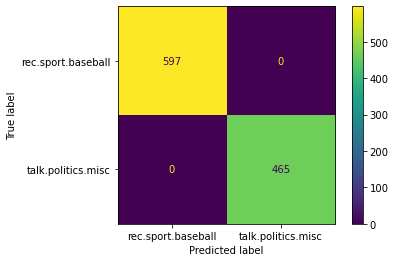

In [23]:
plot_confusion_matrix(model, X_train, y_train, display_labels = target_classes.values())
plt.show()

In [24]:
y_tpreds = model.predict(X_train)
print(f'Naive Bayes Test Accuracy: {accuracy_score(y_train, y_tpreds):.4f}')
print(f'Naive Bayes Test Precision: {precision_score(y_train, y_tpreds):.4f}')
print(f'Naive Bayes Test Recall: {recall_score(y_train, y_tpreds):.4f}')
print(f'Naive Bayes Test F1-Score: {f1_score(y_train, y_tpreds):.4f}')

Naive Bayes Test Accuracy: 1.0000
Naive Bayes Test Precision: 1.0000
Naive Bayes Test Recall: 1.0000
Naive Bayes Test F1-Score: 1.0000


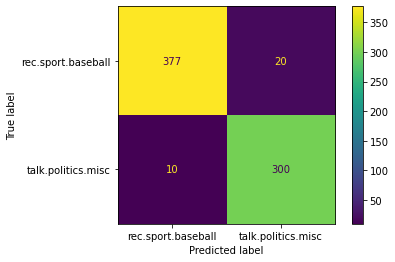

In [25]:
plot_confusion_matrix(model, X_test, y_test, display_labels = target_classes.values())
plt.show()

In [26]:
print(f'Naive Bayes Test Accuracy: {accuracy_score(y_test, y_preds):.4f}')
print(f'Naive Bayes Test Precision: {precision_score(y_test, y_preds):.4f}')
print(f'Naive Bayes Test Recall: {recall_score(y_test, y_preds):.4f}')
print(f'Naive Bayes Test F1-Score: {f1_score(y_test, y_preds):.4f}')

Naive Bayes Test Accuracy: 0.9576
Naive Bayes Test Precision: 0.9375
Naive Bayes Test Recall: 0.9677
Naive Bayes Test F1-Score: 0.9524
